In [22]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [115]:
# Set parameters
nx = 41
L = 2.0
dx = L / (nx-1)
nu = 0.3
sigma = 0.2
dt = sigma * dx**2 / nu
nt = 20

In [116]:
x = numpy.linspace(0.0, L, num=nx)

In [117]:
# Set the initial conditions
u0 = numpy.ones(nx)
mask = numpy.where(numpy.logical_and(x >= 0.5, x <= 1.0))
u0[mask] = 2.0
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


In [118]:
# Integrate in time
u = u0.copy()
for n in range(nt):
    un = u.copy()
    for i in range(1, nx - 1):
        u[i] = un[i] + sigma*(un[i-1] - 2*un[i] + un[i+1])
#    u[0] = 1.0
#    u[-1] = 1.0
    
u_naive = u

In [119]:
u - u0.copy()
for n in range(nt):
    un = u.copy()
    u[1:-1] = un[1:-1] + sigma*(un[:-2] - 2*un[1:-1] + un[2:])

In [120]:
numpy.allclose(u_naive, u) # ensures all elements of u_naive are closed to u

True

In [121]:
# Recall the list at each time step.
def diffusion(u0, sigma=0.5, nt=20):
    u_hist = [u0.copy()]
    u = u0.copy()
    for n in range(nt):
        un = u.copy()
        u[1:-1] = un[1:-1] + sigma*(un[:-2] - 2*un[1:-1] + un[2:])
        u_hist.append(u.copy())
    return u_hist

In [122]:
u_hist = diffusion(u0, sigma=sigma, nt=nt)

In [123]:
len(u_hist)

21

In [124]:
def plot_solution(n, u_hist, x):
    '''n = time step, x = domain'''
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('u')
    pyplot.grid()
    pyplot.plot(x, u_hist[0], label='Initial')
    pyplot.plot(x, u_hist[n], label='Current')
    pyplot.legend()
    pyplot.xlim(0.0, 2.0)
    pyplot.ylim(0.5, 2.5)
    pyplot.show()

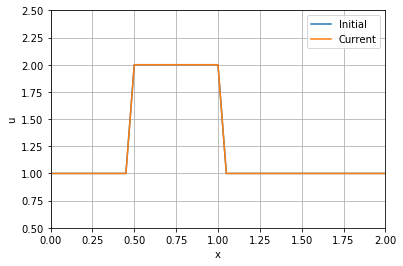

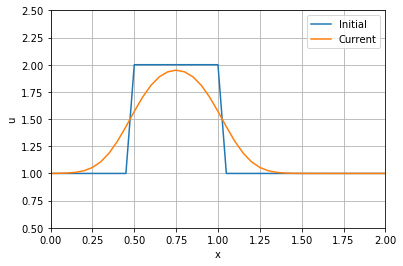

In [125]:
plot_solution(0, u_hist, x)
plot_solution(-1, u_hist, x)

In [126]:
import ipywidgets

In [127]:
# Initialize slider
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='Time step')

# Create interactive plot from ipywidget
# ipywidgets.fixed() fixes the ipywidgets at the parameter provided.
# ipywidgets.interactive(function, parameters....)
w = ipywidgets.interactive(plot_solution, n=nt_slider,
                          u_hist=ipywidgets.fixed(u_hist),
                          x=ipywidgets.fixed(x)) 

In [128]:
display(w)

interactive(children=(IntSlider(value=0, description='Time step', max=20), Output()), _dom_classes=('widget-in…

In [130]:
sigma = 0.5
u_hist = diffusion(u0, sigma=sigma, nt=nt)
# Initialize slider
nt_slider = ipywidgets.IntSlider(value=0, min=0, max=nt, step=1,
                                 description='Time step')

# Create interactive plot from ipywidget
# ipywidgets.fixed() fixes the ipywidgets at the parameter provided.
# ipywidgets.interactive(function, parameters....)
w = ipywidgets.interactive(plot_solution, n=nt_slider,
                          u_hist=ipywidgets.fixed(u_hist),
                          x=ipywidgets.fixed(x)) 

In [131]:
display(w)

interactive(children=(IntSlider(value=0, description='Time step', max=20), Output()), _dom_classes=('widget-in…